In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyflct
from scipy.stats import pearsonr
from astropy.io import fits

<h1 style = "color:magenta; font-family: Times New Roman">MURAM simulacija - Analiza </h1>

In [10]:
# Ucitavamo fajl realnim podacima
cube = fits.open("qs_ph_disk_center.fits")[0].data[:,:,0,0:80]

In [11]:
cube.shape

(11, 71, 80)

In [15]:
atmos = fits.open("qs_ph_disk_center.fits")[0].data

In [16]:
atmos.shape

(11, 71, 1536, 1536)

In [17]:
atmos = atmos.transpose(0,3,2,1)

In [18]:
print(atmos[0,0,0,:])

[ 1.5  1.4  1.3  1.2  1.1  1.   0.9  0.8  0.7  0.6  0.5  0.4  0.3  0.2
  0.1  0.  -0.1 -0.2 -0.3 -0.4 -0.5 -0.6 -0.7 -0.8 -0.9 -1.  -1.1 -1.2
 -1.3 -1.4 -1.5 -1.6 -1.7 -1.8 -1.9 -2.  -2.1 -2.2 -2.3 -2.4 -2.5 -2.6
 -2.7 -2.8 -2.9 -3.  -3.1 -3.2 -3.3 -3.4 -3.5 -3.6 -3.7 -3.8 -3.9 -4.
 -4.1 -4.2 -4.3 -4.4 -4.5 -4.6 -4.7 -4.8 -4.9 -5.  -5.1 -5.2 -5.3 -5.4
 -5.5]


In [23]:
# Ucitavamo sinteticki spektar
cube = fits.open("qs_ph_disk_center_synth.fits")[0].data

In [24]:
cube.shape

(1536, 1536, 4, 201)

In [21]:
#cube = fits.open("qs_ph_disk_center_synth.fits")[0].data[:,:,0,0:80]

In [25]:
I = np.copy(cube[:,:,0,:])

In [26]:
del(cube)

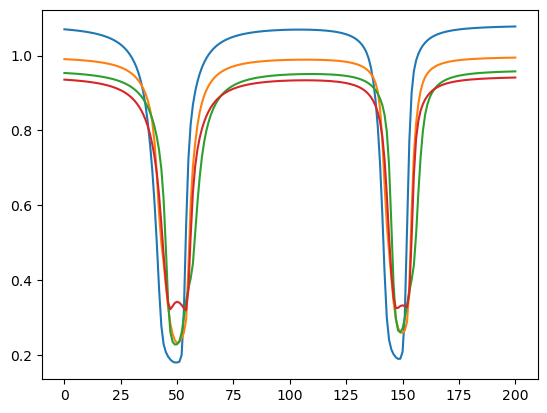

In [27]:
# Plotujemo I da se uverimo da je intenzitet
plt.plot(I[0,0])
plt.plot(I[100,100])
plt.plot(I[600,100])
plt.plot(I[200,500])

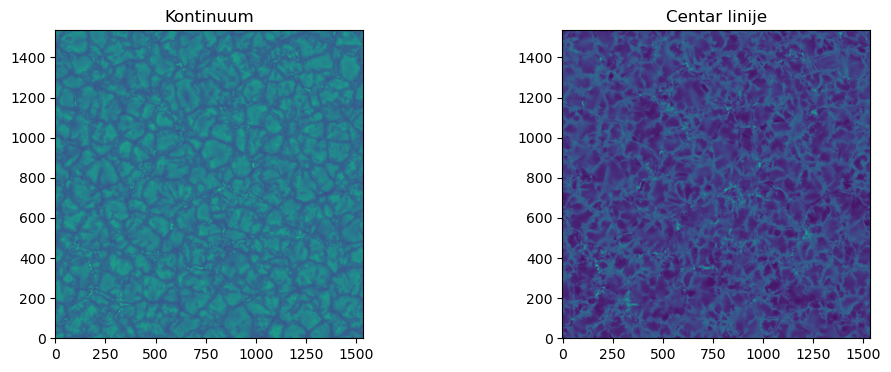

In [28]:
# Plotujemo kontinuum i centar linije
plt.figure(figsize=[12,4])
plt.subplot(121)
plt.title("Kontinuum")
plt.imshow(I[:,:,0].T, origin='lower')
plt.subplot(122)
plt.title("Centar linije")
plt.imshow(I[:,:,44].T, origin='lower')

In [2]:
atmos = fits.open("qs_ph_disk_center.fits")[0].data # realni
cube = fits.open("qs_ph_disk_center_synth.fits")[0].data # sinteticki

In [3]:
# Ucitali smo intentizete. Nakon toga treba odabrati intenzitet na nekoliko talasnih duzina
I_1 = cube[:,:,0,0]
I_2 = cube[:,:,0,16]
I_3 = cube[:,:,0,44]
I_4 = cube[:,:,0,65]
I_5 = cube[:,:,0,90]

In [14]:
cube.shape

(1536, 1536, 4, 201)

In [10]:
atmos.shape

(11, 71, 1536, 1536)

In [4]:
atmos = atmos.transpose(0, 3, 2, 1)

In [17]:
atmos.shape

(11, 1536, 1536, 71)

In [23]:
I_1.shape

(1536, 1536)

<h1 style = "color: navy; font-family: Times New Roman"> Korelacija intenziteta i temperature</h1>

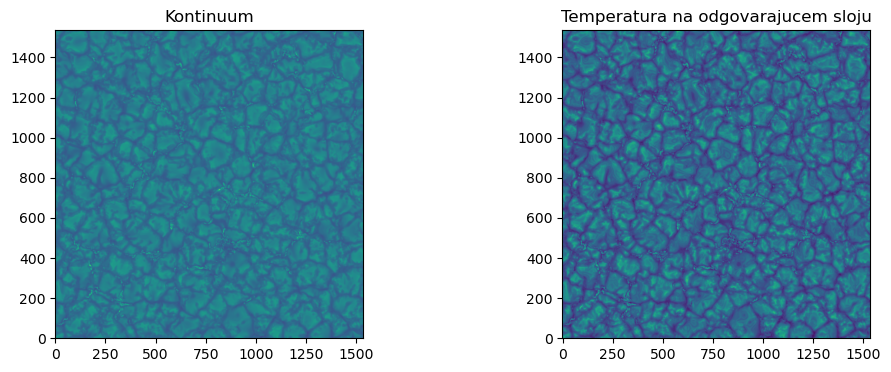

In [6]:
# Zelimo da uporedimo intentizitet i temperaturu, tj. istraziti korelaciju izmedju ove dve velicine 
# za prethodno izdvojene talasne duzine
# Da bismo to uradili, koristicemo plot za fizicku inspekciju i Pearson-ovo koeficijent korelacije 
# za numericku inspekciju
#I = np.copy(cube[:,:,0,:])
plt.figure(figsize = [12,4])
plt.subplot(121)
plt.title("Kontinuum")
plt.imshow(I_1[:,:].T, origin='lower')
plt.subplot(122)
plt.title("Temperatura na odgovarajucem sloju")
plt.imshow(atmos[1,:,:,15].T, origin='lower')

In [7]:
r = pearsonr(I_1[:,:].flatten(), atmos[1,:,:,15].flatten())
print(r)

(0.9546528747129863, 0.0)


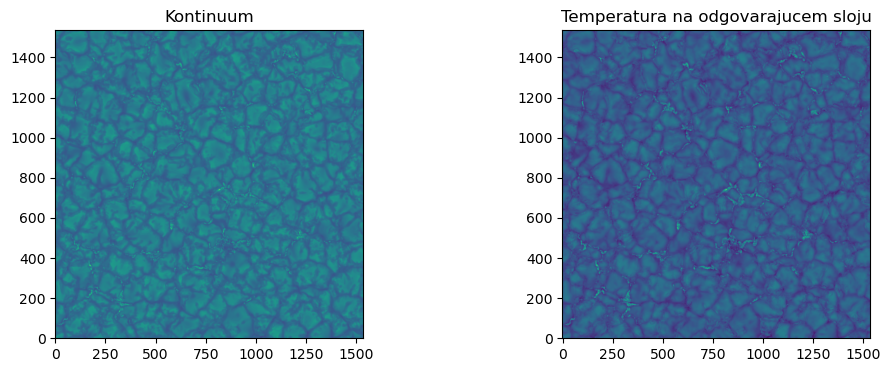

In [10]:
# U kontinuumu je korelacija izmedju temperature i intenziteta je prilicno dobra
# Dalje, treba da "zadjemo" u spektralnu liniju i da procenimo na kojoj dubini se formira
plt.figure(figsize = [12,4])
plt.subplot(121)
plt.title("Krilo linije")
plt.imshow(I_2[:,:].T, origin='lower')
plt.subplot(122)
plt.title("Temperatura na odgovarajucem sloju")
plt.imshow(atmos[1,:,:,18].T, origin='lower')

In [11]:
r = pearsonr(I_2[:,:].flatten(), atmos[1,:,:,18].flatten()) #(0.7187738428481343, 0.0) za tau 20
print(r)

(0.8985721020589168, 0.0)


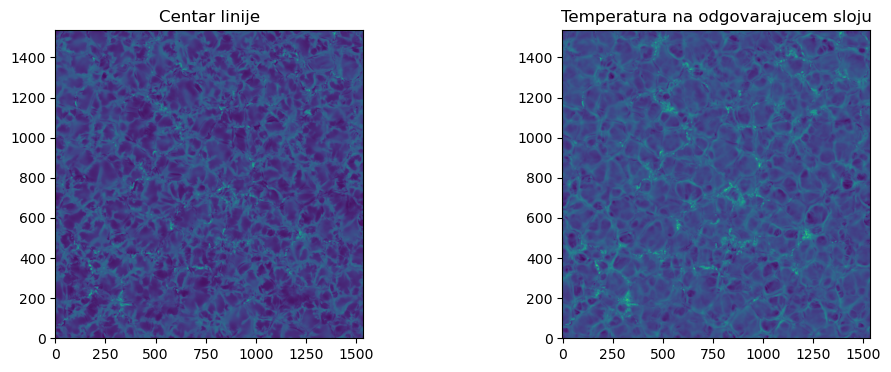

In [16]:
# Dalje, treba da "zadjemo" u spektralnu liniju i da procenimo na kojoj dubini se formira
plt.figure(figsize = [12,4])
plt.subplot(121)
plt.title("Centar linije")
plt.imshow(I_3[:,:].T, origin='lower')
plt.subplot(122)
plt.title("Temperatura na odgovarajucem sloju")
plt.imshow(atmos[1,:,:,31].T, origin='lower')

In [17]:
r = pearsonr(I_3[:,:].flatten(), atmos[1,:,:,31].flatten()) #(0.7112803097052572, 0.0) za 30
print(r)

(0.7020801921264499, 0.0)


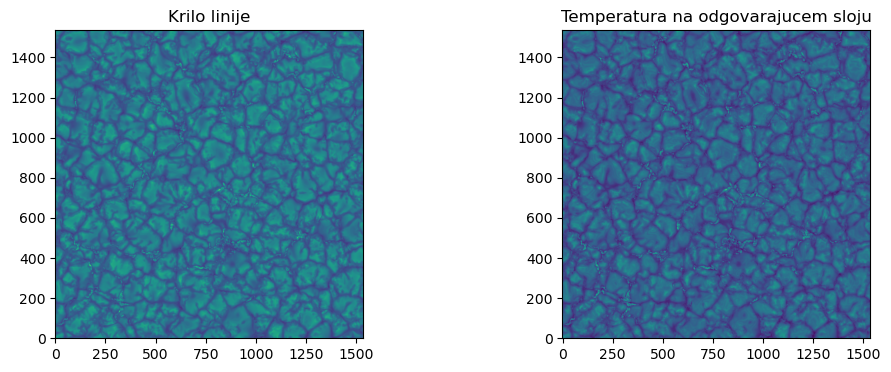

In [18]:
# Dalje, treba da "zadjemo" u spektralnu liniju i da procenimo na kojoj dubini se formira
plt.figure(figsize = [12,4])
plt.subplot(121)
plt.title("Krilo linije")
plt.imshow(I_4[:,:].T, origin='lower')
plt.subplot(122)
plt.title("Temperatura na odgovarajucem sloju")
plt.imshow(atmos[1,:,:,16].T, origin='lower')

In [19]:
r = pearsonr(I_4[:,:].flatten(), atmos[1,:,:,16].flatten()) 
print(r)

(0.9365579848580067, 0.0)


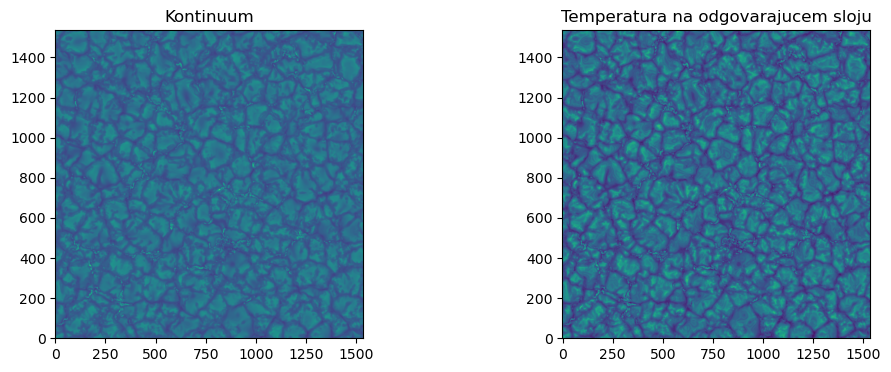

In [20]:
# Dalje, treba da "zadjemo" u spektralnu liniju i da procenimo na kojoj dubini se formira
plt.figure(figsize = [12,4])
plt.subplot(121)
plt.title("Kontinuum")
plt.imshow(I_5[:,:].T, origin='lower')
plt.subplot(122)
plt.title("Temperatura na odgovarajucem sloju")
plt.imshow(atmos[1,:,:,15].T, origin='lower')

In [21]:
r = pearsonr(I_5[:,:].flatten(), atmos[1,:,:,15].flatten()) 
print(r)

(0.9556974992547627, 0.0)


<p style = "color:black; font-family:Times New Roman"> Korelacije su zadovoljavajuce. Treba proveriti da li postoje bolje, tj. da li mozemo preciznije odrediti sloj formiranja linija. </p>

<h1 style = "color:gray; font-family: Times New Roman"> Kruzna polarizacija i z-komponenta magnetnog polja</h1>

In [5]:
# Ucitavamo kruznu polarizaciju
V_1 = cube[:,:,3,0]
V_2 = cube[:,:,3,16]
V_3 = cube[:,:,3,44]
V_4 = cube[:,:,3,65]
V_5 = cube[:,:,3,90]

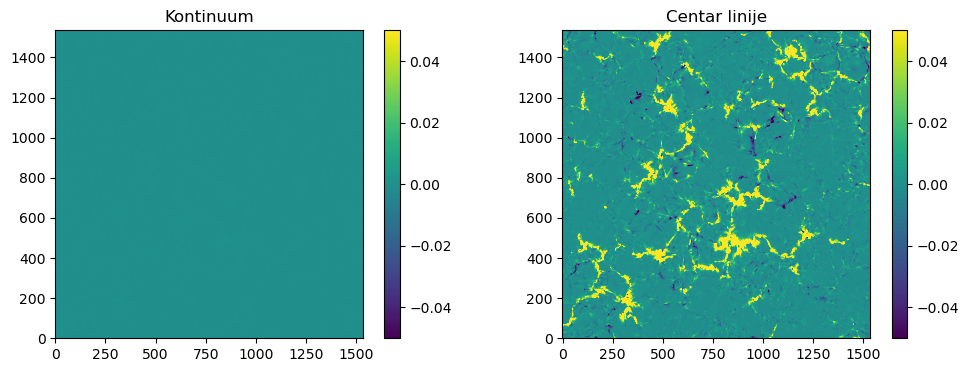

In [7]:
plt.figure(figsize=[12,4])
plt.subplot(121)
plt.title("Kontinuum")
plt.imshow(V_1[:,:].T, origin='lower', vmin=-0.05,vmax=0.05)
plt.colorbar()
plt.subplot(122)
plt.title("Centar linije")
plt.imshow(V_3[:,:].T, origin='lower', vmin=-0.05,vmax=0.05)
plt.colorbar()

In [8]:
Bz = atmos[4] * np.cos(np.radians(atmos[6]))

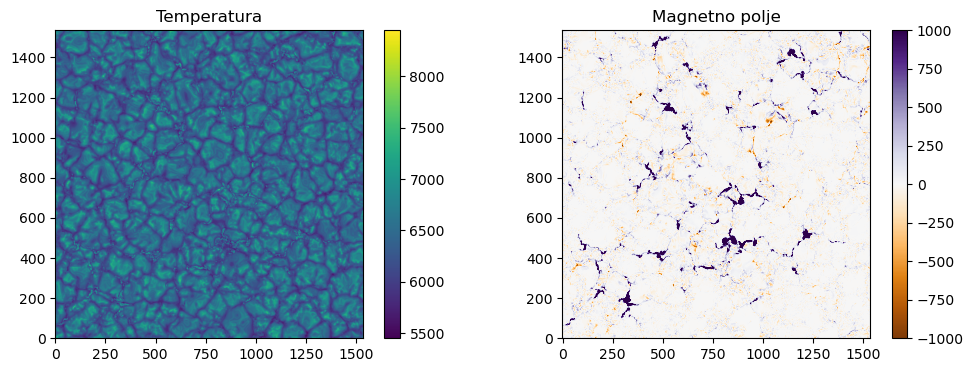

In [9]:
# Poredjenje temperature i magnetnog polja na tau = 1

plt.figure(figsize=[12,4])
plt.subplot(121)
plt.title("Temperatura")
plt.imshow(atmos[1,:,:,15].T, origin='lower')
plt.colorbar()
plt.subplot(122)
plt.title("Magnetno polje")
plt.imshow(Bz[:,:,15].T, origin='lower', vmin=-1000,vmax=1000, cmap = 'PuOr')
plt.colorbar()

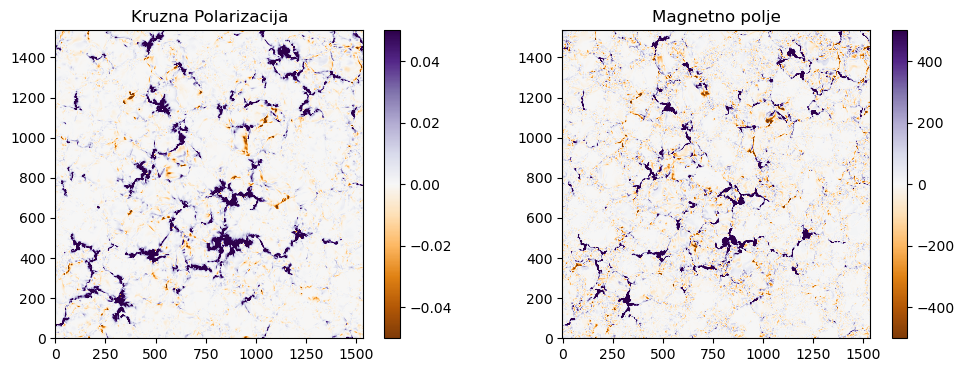

In [11]:
# Kruzna polarizacija vs magnetno polje
plt.figure(figsize=[12,4])
plt.subplot(121)
plt.title("Kruzna Polarizacija")
plt.imshow(V_3[:,:].T, origin='lower', vmin=-0.05,vmax=0.05, cmap='PuOr')
plt.colorbar()
plt.subplot(122)
plt.title("Magnetno polje")
plt.imshow(Bz[:,:,15].T, origin='lower', vmin=-500,vmax=500, cmap = 'PuOr')
plt.colorbar()

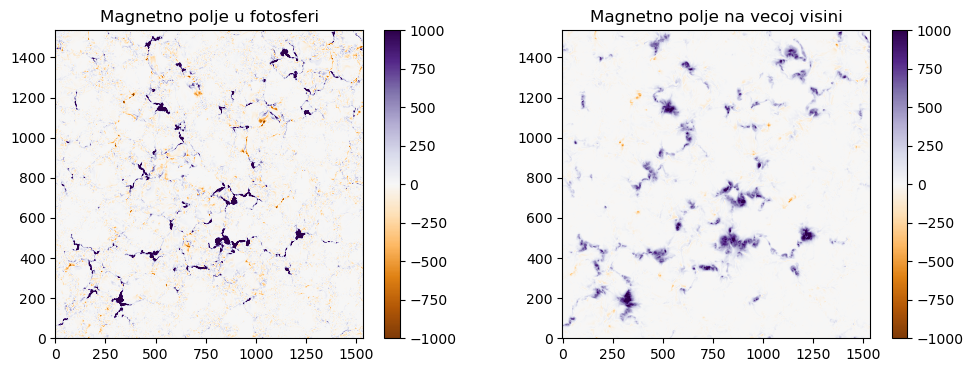

In [12]:
# Poredjenje magnetnog polja u razlicitim slojevima
plt.figure(figsize=[12,4])
plt.subplot(121)
plt.title("Magnetno polje u fotosferi")
plt.imshow(Bz[:,:,15].T, origin='lower', vmin=-1000,vmax=1000, cmap = 'PuOr')
plt.colorbar()
plt.subplot(122)
plt.title("Magnetno polje na vecoj visini")
plt.imshow(Bz[:,:,45].T, origin='lower', vmin=-1000,vmax=1000, cmap = 'PuOr')
plt.colorbar()

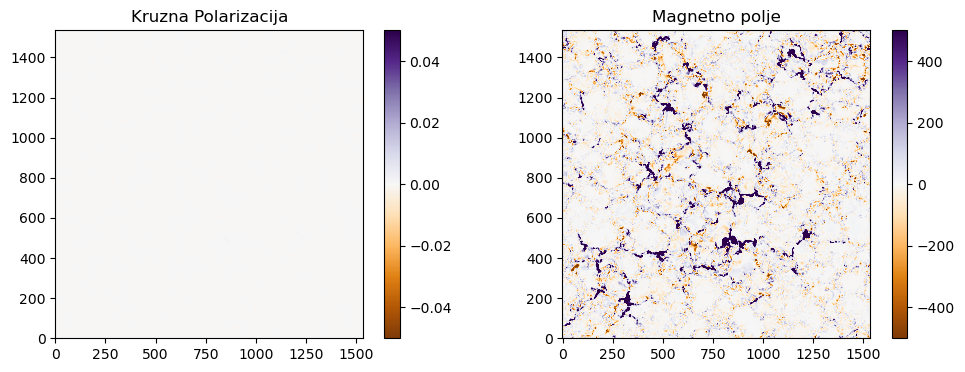

In [13]:
# Sada zelimo da odredimo korelaciju izmedju kruzne polarizacije i Bz kao sto
# smo radili za temperaturu i intenzitet
plt.figure(figsize=[12,4])
plt.subplot(121)
plt.title("Kruzna Polarizacija")
plt.imshow(V_1[:,:].T, origin='lower', vmin=-0.05,vmax=0.05, cmap='PuOr')
plt.colorbar()
plt.subplot(122)
plt.title("Magnetno polje")
plt.imshow(Bz[:,:,15].T, origin='lower', vmin=-500,vmax=500, cmap = 'PuOr')
plt.colorbar()

In [14]:
r = pearsonr(V_1[:,:].flatten(), Bz[:,:,15].flatten()) 
print(r)

(0.7102295596751287, 0.0)


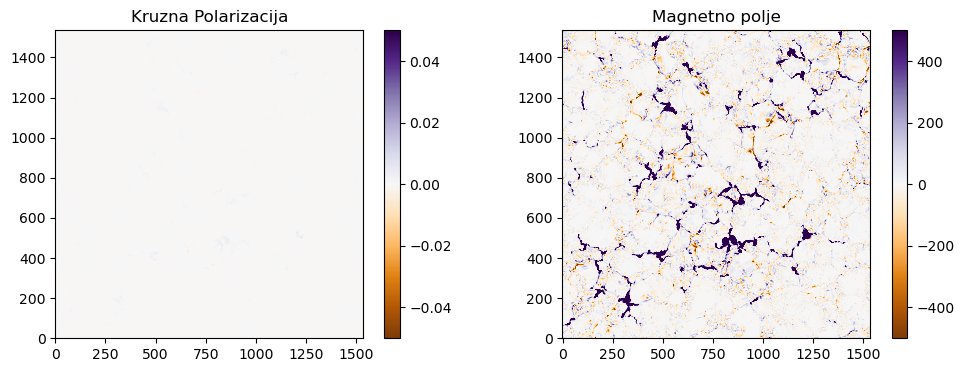

In [15]:
plt.figure(figsize=[12,4])
plt.subplot(121)
plt.title("Kruzna Polarizacija")
plt.imshow(V_2[:,:].T, origin='lower', vmin=-0.05,vmax=0.05, cmap='PuOr')
plt.colorbar()
plt.subplot(122)
plt.title("Magnetno polje")
plt.imshow(Bz[:,:,18].T, origin='lower', vmin=-500,vmax=500, cmap = 'PuOr')
plt.colorbar()

In [17]:
r = pearsonr(V_2[:,:].flatten(), Bz[:,:,18].flatten()) 
print(r)

(0.6394535832150465, 0.0)


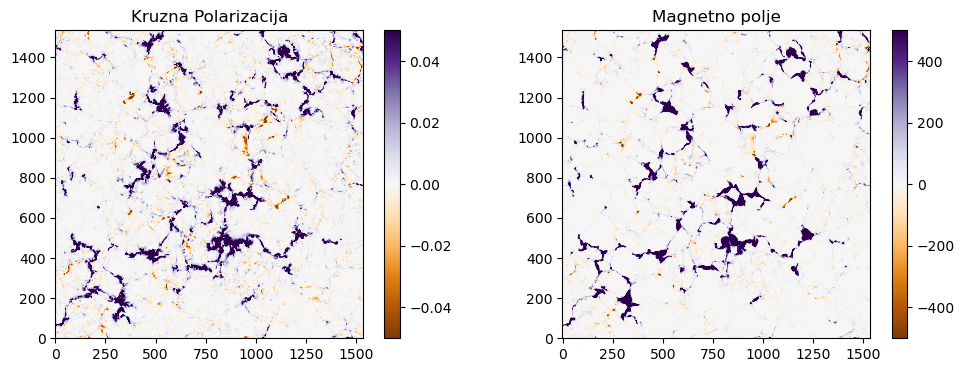

In [18]:
plt.figure(figsize=[12,4])
plt.subplot(121)
plt.title("Kruzna Polarizacija")
plt.imshow(V_3[:,:].T, origin='lower', vmin=-0.05,vmax=0.05, cmap='PuOr')
plt.colorbar()
plt.subplot(122)
plt.title("Magnetno polje")
plt.imshow(Bz[:,:,31].T, origin='lower', vmin=-500,vmax=500, cmap = 'PuOr')
plt.colorbar()

In [20]:
r = pearsonr(V_3[:,:].flatten(), Bz[:,:,31].flatten()) 
print(r)

(0.699806462671652, 0.0)


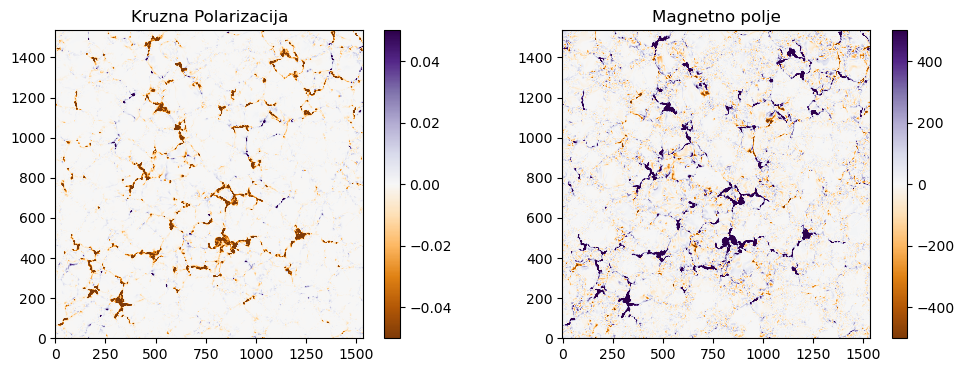

In [21]:
plt.figure(figsize=[12,4])
plt.subplot(121)
plt.title("Kruzna Polarizacija")
plt.imshow(V_4[:,:].T, origin='lower', vmin=-0.05,vmax=0.05, cmap='PuOr')
plt.colorbar()
plt.subplot(122)
plt.title("Magnetno polje")
plt.imshow(Bz[:,:,16].T, origin='lower', vmin=-500,vmax=500, cmap = 'PuOr')
plt.colorbar()

In [ ]:
# Priblizni slojevi

In [22]:
r = pearsonr(V_4[:,:].flatten(), Bz[:,:,16].flatten()) 
print(r)

(-0.6932089151604683, 0.0)


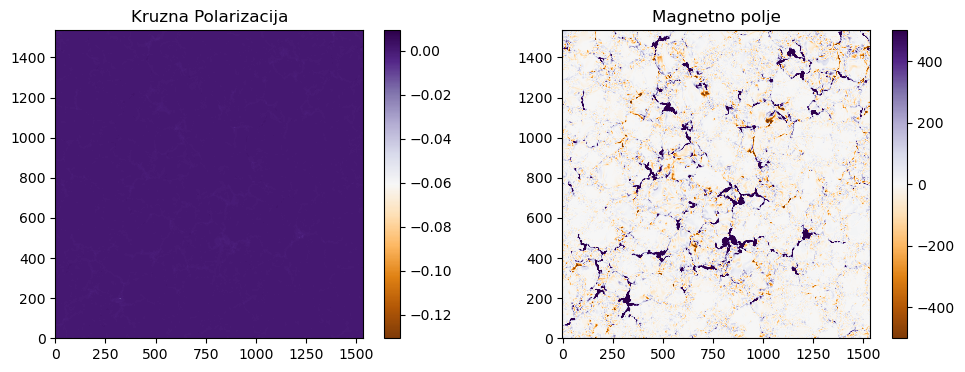

In [25]:
plt.figure(figsize=[12,4])
plt.subplot(121)
plt.title("Kruzna Polarizacija")
plt.imshow(V_5[:,:].T, origin='lower', cmap='PuOr')
plt.colorbar()
plt.subplot(122)
plt.title("Magnetno polje")
plt.imshow(Bz[:,:,15].T, origin='lower', vmin=-500,vmax=500, cmap = 'PuOr')
plt.colorbar()

In [24]:
r = pearsonr(V_5[:,:].flatten(), Bz[:,:,15].flatten()) 
print(r)

(-0.6482969883831102, 0.0)


<p style = "color:black; font-family:Times New Roman">Vidimo da je situacija u ovom slucaju bitno razlicita
    jer za isti izbor talasnih duzina u kontinuumu imamo najvecu korelaciju, ali ona je i negativna za neke
    talasne duzine. Korelacija je najmanja u centru linije. Linije bi trebalo da budu blize linearnoj 
    polarizaciji. </p>